In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def loadImg(img):
  im = cv2.imread(img)
  return im[:,:,::-1]

In [ ]:
def show(im, size=8, color=None):
  _, ax = plt.subplots(figsize=(size, size))
  if color:
    ax.imshow(im, interpolation="nearest", cmap=color)
  else:
    ax.imshow(im, interpolation="nearest")
  plt.tight_layout()
  plt.show()

# Tarea Académica 1 #

**Filtro a utilizar:** Filtros no lineales y de perfilado
 
**Por qué:** La imagen requiere que se resalten los objetos de la imagen porque parece que tuvieran un suavizado o filtro blanco sobre ella. Entonces para resaltar los colores, se deben usar filtros no lineales para eliminar esa "capa blanca". Para poder terminar de resaltar todos los elementos, se deben definir los bordes de los elementos y para ello se utilizan los filtros de perfilado.
 
**Configuración:** Para el filtro no lineal es el filtro Fuerte/Maximo. Para el filtro de perfilado es el filtro de Laplace
 
**Orden de los filtros:** Para lograr el mejor efecto en la imagen, se debe seguir el siguiente orden:
1. Filtro Maximo/Fuerte: Esto resaltará los elementos de toda la imagen y no sólo los bordes, permitiendo deshomogeneizar la imagen y volverla más heterogénea al resaltar los colores.
 
2. Filtro Laplace: Esto permitirá resaltar los bordes de los elementos, dándoles más definición y así resaltar más la imagen.
 
**Sobre el filtro máximo:** Este filtro es un tipo de filtro estadístico que utiliza la función máxima, encontrando el mayor valor del DataSet. 


In [ ]:
im_galaxia = cv2.imread("Galaxia.jpg")

In [ ]:
imgs_galaxia = cv2.cvtColor(im_galaxia, cv2.COLOR_BGR2GRAY)

In [ ]:
def laplace(imgs, mask):
  imgs2 = cv2.filter2D(src=imgs, ddepth=-1, kernel=mask)
  plt.subplots(figsize=(14, 14))
  plt.subplot(1, 2, 1)
  plt.imshow(imgs, cmap="gray")
  plt.axis("off")
  plt.subplot(1, 2, 2)
  plt.imshow(imgs2, cmap="gray")
  plt.axis("off")
  plt.show()
  return imgs2

In [ ]:
mask = np.array([1, 1, 1, 1, -8, 1, 1, 1, 1]).reshape(3, 3)

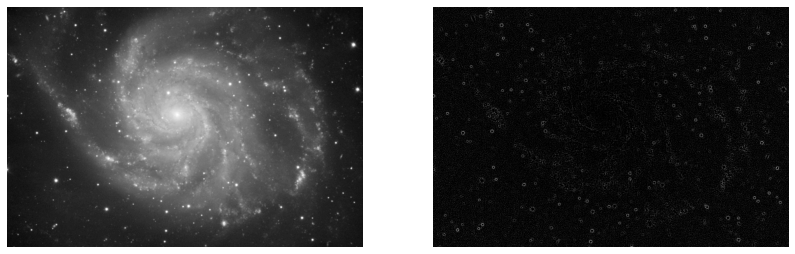

array([[12, 20,  0, ...,  0,  0,  0],
       [ 0,  0, 11, ...,  3, 23,  0],
       [11,  0,  0, ...,  0, 11,  5],
       ...,
       [ 5,  0,  2, ...,  6, 24,  0],
       [ 0, 19,  0, ...,  0,  3,  0],
       [ 0,  7,  0, ..., 15,  7,  2]], dtype=uint8)

In [ ]:
laplace(imgs_galaxia, mask)

# Tarea Academica 2

**Filtro a utilizar:** Sharpening/perfilado y no lineales
 
**Por qué:** En esta imagen se desea resaltar la huella digital que está compuesta de bordes. Los filtros de Sharpening utilizan derivadas para resaltar los bordes de la imagen exclusivamente y sin hacer un efecto de blur/suavizado. No obstante, también tiene algo de ruido la imagen por lo que se deben aplicar filtros no lineales
 
**Configuración:** Filtro de Laplace en el caso de perfilado.
 
**Orden:** Para obtener los mejores resultados, se debe seguir el siguiente orden
1. Suavizado: Se elimina el poco ruido de la imagen
 
2. Laplace: Con la imagen limpia, se aplica el filtro para resaltar los bordes de las huellas dactilares.
 
**Sobre Laplace:** Laplace detecta las diferencias en las derivadas trabajando en un nuevo dominio espacial, para luego aplicar la solución encontrada en el dominio actual. Esto permite que se resalten los bordes de la imagen.

In [ ]:
im_huella_1 = cv2.imread("huella_1.jpg")
im_huella_2 = cv2.imread("huella_2.jpg")
im_huella_3 = cv2.imread("huella_3.jpg")
im_huella_4 = cv2.imread("huella_4.jpg")

In [ ]:
imgs_huella_1 = cv2.cvtColor(im_huella_1, cv2.COLOR_BGR2GRAY)
imgs_huella_2 = cv2.cvtColor(im_huella_2, cv2.COLOR_BGR2GRAY)
imgs_huella_3 = cv2.cvtColor(im_huella_3, cv2.COLOR_BGR2GRAY)
imgs_huella_4 = cv2.cvtColor(im_huella_4, cv2.COLOR_BGR2GRAY)

In [ ]:
def median_filter(img):
  img1 = cv2.medianBlur(img, 3)
  plt.subplots(figsize=(14, 14))
  plt.subplot(1, 2, 1)
  plt.imshow(img, cmap="gray")
  plt.axis("off")
  plt.subplot(1, 2, 2)
  plt.imshow(img1, cmap="gray")
  plt.axis("off")
  plt.show()
  return img1

In [ ]:
def laplace(imgs, mask):
  imgs2 = cv2.filter2D(src=imgs, ddepth=-1, kernel=mask)
  plt.subplots(figsize=(14, 14))
  plt.subplot(1, 2, 1)
  plt.imshow(imgs, cmap="gray")
  plt.axis("off")
  plt.subplot(1, 2, 2)
  plt.imshow(imgs2, cmap="gray")
  plt.axis("off")
  plt.show()
  return imgs2

In [ ]:
mask = np.array([1, 1, 1, 1, -8, 1, 1, 1, 1]).reshape(3, 3)

### Filtro de Mediana aplicado a la imagen

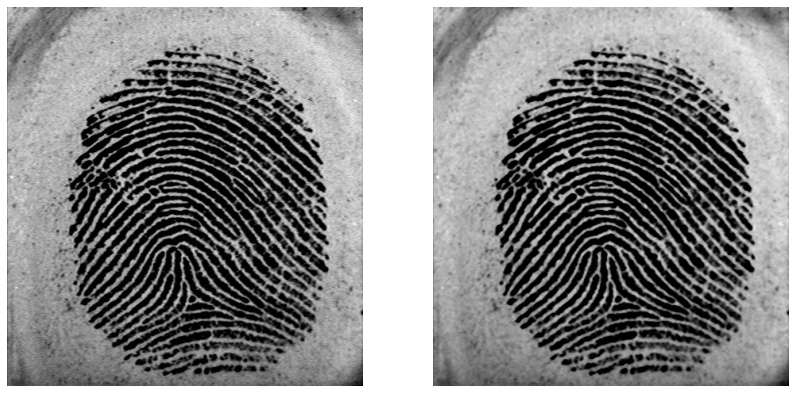

In [ ]:
m_imgs_huella_1 = median_filter(imgs_huella_1)

## Laplacian aplicado a la imagen resultante

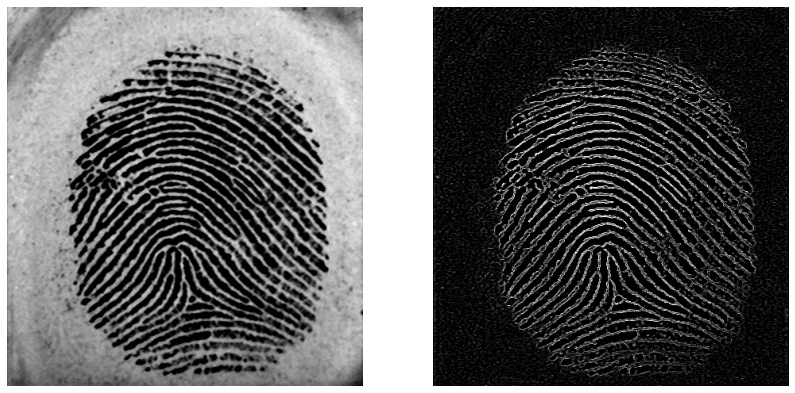

In [ ]:
mask = np.array([-1, -1, -1, -1, 8, -1, -1, -1, -1]).reshape(3, 3)
l = laplace(m_imgs_huella_1, mask)

#Tarea Academica 3

**Filtro a utilizar:** Filtro de perfilado y filtro no lineal de tipo estadístico
 
**Por qué:** Esta imagen presenta mucho ruido de sal y pimienta, por lo que se debe utilizar un filtro estadístico ya que son los mejores para blurrear imperfecciones y eliminar el ruido. De todos los filtros estadísticos, el mejor filtro estadístico para eliminar el ruido sal y pimienta es la mediana. 
 
Debido a que la mediana es un filtro estadístico, deja un blurr como efecto secundario. Para poder terminar de definir los elementos de la imagen, se utiliza el filtro de perfilado para definir mejor los elementos de la imagen ya que tendrán sus bordes más definidos. Los filtros de perfilado, se encargan de resaltar los bordes de la imagen con la ventaja de que no blurrea la imagen como efecto secundario.
 
**Configuración:** Filtro de la mediana para el filtro estadístico y para el filtro de perfilado se utiliza laplace
 
**Orden:** El orden para el mejor resultado es:
1. Filtro Mediana: Se debe limpiar todo el ruido de sal y pimienta de la imagen
 
2. Filtro Media: es el promedio, eso te deja homogeneizar la imagen y eliminar imperfecciones

3. Filtro gaussian blur: es un filtro lineal, sirve para borrar el ruido y difuminar 
 
**Sobre la mediana:** La mediana identifica el valor central del DataSet, lo que permite calcular la diferencia de los demás valores del DataSet con este. Como consecuencia, se puede homogeneizar la imagen de mejor manera


Inicialización de imagenes 

In [ ]:
img1 = "Arbol.jpg"
img2 = "Radiografia.jpg"

Funciones para el filtrado

In [ ]:
def filtering(im, mask):
  rowsMask, colsMask = mask.shape
  rowPadding = rowsMask // 2
  colPadding = colsMask // 2
  rows, cols = im.shape
  temp = np.zeros((rows + 2*rowPadding, cols + 2*colPadding))
  temp[rowPadding:rowPadding+rows, colPadding:colPadding+cols] = im
  out = np.zeros_like(temp)
  for r in range(rows):
    for c in range(cols):
      out[r + rowPadding, c + colPadding] = np.sum(
        np.multiply(mask, temp[r:r+rowsMask, c:c+colsMask]))
  return out[rowPadding:rowPadding+rows, colPadding:colPadding+cols]

In [ ]:
def gaussianMask(l=3, sig=1.0):
  ax = np.linspace(-(l-1) / 2.0, (l-2) / 2.0, l)
  xx, yy = np.meshgrid(ax, ax)
  kernel = np.exp(-0.5 * (np.square(xx) + np.square(yy)) / np.square(sig))

  return kernel / np.sum(kernel)

Se cargan las imagenes

In [ ]:
arbol = loadImg(img1)
placa = loadImg(img2)

Configuración de imagenes

In [ ]:
ruido1 = cv2.cvtColor(arbol, cv2.COLOR_BGR2GRAY)
ruido2 = cv2.cvtColor(placa, cv2.COLOR_BGR2GRAY)

Filtrado

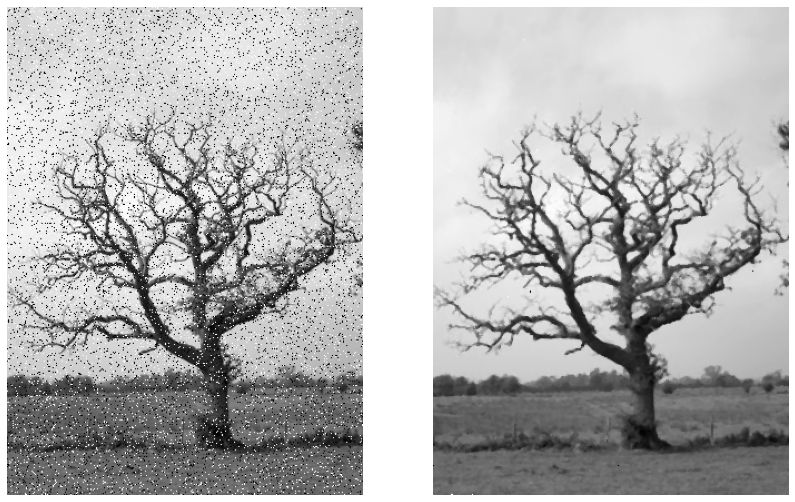

In [ ]:
#Se realizó un un filtrado de mediana 
#tomando el promedio de pixeles a su alrededor para 
#con la finalidad de desaparecer los rastros de 
#sal y pimienta en la imagen
#Se evito utilizar median blur para no perder detalles de la imagen
sinruido = cv2.medianBlur(ruido1, 3)
plt.subplots(figsize=(14, 14))
plt.subplot(1, 2, 1)
plt.imshow(ruido1, cmap="gray")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(sinruido, cmap="gray")
plt.axis("off")
plt.show()

In [ ]:
def median_mean_gaussian_blur(im, mask_m, mask_b):
  nonoise = cv2.medianBlur(im, 7)
  nonoise1 = cv2.filter2D(src=nonoise, ddepth=-1, kernel=mask_m)
  mask_t = mask_b / np.sum(mask_b)
  im2 = filtering(nonoise1, mask_t)
  plt.subplots(figsize=(15, 15))
  plt.subplot(1, 2, 1)
  plt.imshow(im, cmap="gray")
  plt.axis("off")
  plt.subplot(1, 2, 2)
  plt.imshow(im2, cmap="gray")
  plt.axis("off")
  plt.show()

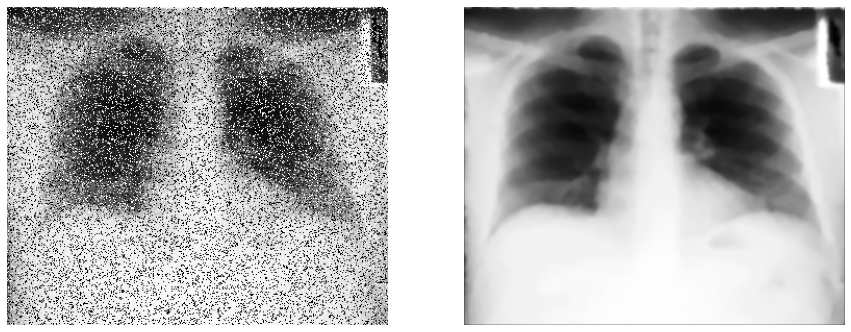

In [ ]:
mask_m = np.full((3, 3), 1/9)
mask_b = np.array([1, 2, 1, 2, 4, 2, 1, 2, 1]).reshape(3, 3)
ruido2 = cv2.cvtColor(placa, cv2.COLOR_BGR2GRAY)
median_mean_gaussian_blur(ruido2, mask_m,mask_b)